In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import os

# Specify the directory path where the Excel files are located
directory_path = 'D:\combo_IC50_skew_kurt_data'  # Replace with the actual directory path

# Get a list of Excel files in the specified directory
csv_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame()

# Loop through the Excel files and concatenate them
for file in csv_files:
    df = pd.read_csv(file)  # Read each Excel file
    concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

# Now, 'concatenated_df' contains the combined data from all Excel files in the specified directory.

# You can further process or save the concatenated DataFrame as needed.
valid_data = pd.read_csv(r'D:\combo_IC50_skew_kurt_data\validation\chunk_14.csv')

In [3]:
# creating  x and y
# Separate the input features (X) and target labels (Y)
X = concatenated_df.drop('Combo IC50', axis = 1)  # Replace 'target_column_name' with the actual column name of the target variable
Y = concatenated_df['Combo IC50']

X_valid = valid_data.drop('Combo IC50', axis = 1)
Y_valid = valid_data['Combo IC50']
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=4002)
# Create and train the Ridge regression model
alpha = 10  # You can adjust the regularization strength (alpha) as needed
ridge_model = Ridge(alpha=alpha, fit_intercept=True)
ridge_model.fit(X_train, Y_train)


Ridge(alpha=10)

In [4]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [14]:
import shap

# Assuming you have a fitted Ridge model named 'ridge_model'
def model_predict(X):
    return ridge_model.predict(X)

# Create a SHAP explainer for your model using KernelExplainer
explainer = shap.KernelExplainer(model_predict, X_train)

# Calculate SHAP values for your test data
shap_values = explainer.shap_values(X_test)




X does not have valid feature names, but Ridge was fitted with feature names
Using 107709 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/35903 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [7]:
# Fit the model to the training data
ridge_model.fit(X_train, Y_train)

# Initialize the SHAP explainer
explainer = shap.Explainer(ridge_model)


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: Ridge(alpha=10)

In [ ]:
# Calculate SHAP values for a specific prediction (e.g., the first test sample)
shap_values = explainer.shap_values(X_test.iloc[0])

# Visualize the SHAP values for that prediction using a force plot
shap.initjs()  # Initialize JavaScript visualization (required for force plots)
shap.force_plot(explainer.expected_value[0], shap_values, X_test.iloc[0])

In [ ]:
import numpy as np
# Assuming you have already calculated shap_values for a specific prediction

# Calculate the absolute SHAP values for the specific prediction
abs_shap_values = np.abs(shap_values)

# Sort the absolute SHAP values in descending order to identify the top features
sorted_indices = np.argsort(abs_shap_values)[::-1]

# Select the top 20 features and their corresponding SHAP values
top_20_indices = sorted_indices[:20]
top_20_features = X_test.columns[top_20_indices]
top_20_shap_values = shap_values[top_20_indices]




In [ ]:
# Create a DataFrame with only the top 20 features for the specific prediction
top_20_features_df = X_test.iloc[0][top_20_features]




In [ ]:
# Convert the top 20 features DataFrame to a matrix-like format
top_20_features_matrix = top_20_features_df.values.reshape(1, -1)

# Visualize the top 20 features and their SHAP values as a bar plot with feature names on the y-axis
shap.summary_plot(top_20_shap_matrix, top_20_features_matrix, plot_type='bar', feature_names=top_20_features)

Mean Squared Error: 0.2237084347470767
Root Mean Squared Error: 0.4729782603324139
Mean Absolute Error: 0.25774214638510956
R-squared: 0.97980009250733
Explained Variance Score: 0.9798005898479489
Mean Squared Error (validation set): 0.23395258277257464
Root Mean Squared Error (validation set): 0.48368645088794315
Mean Absolute Error (validation set): 0.2571603467174955
R-squared (validation set): 0.9790530259293316
Explained Variance Score (validation set): 0.9790530315095649
Cross-Validation Scores: [0.98100969 0.97928717 0.97698105 0.98159414 0.97917299 0.97928139
 0.98040538 0.97851529]


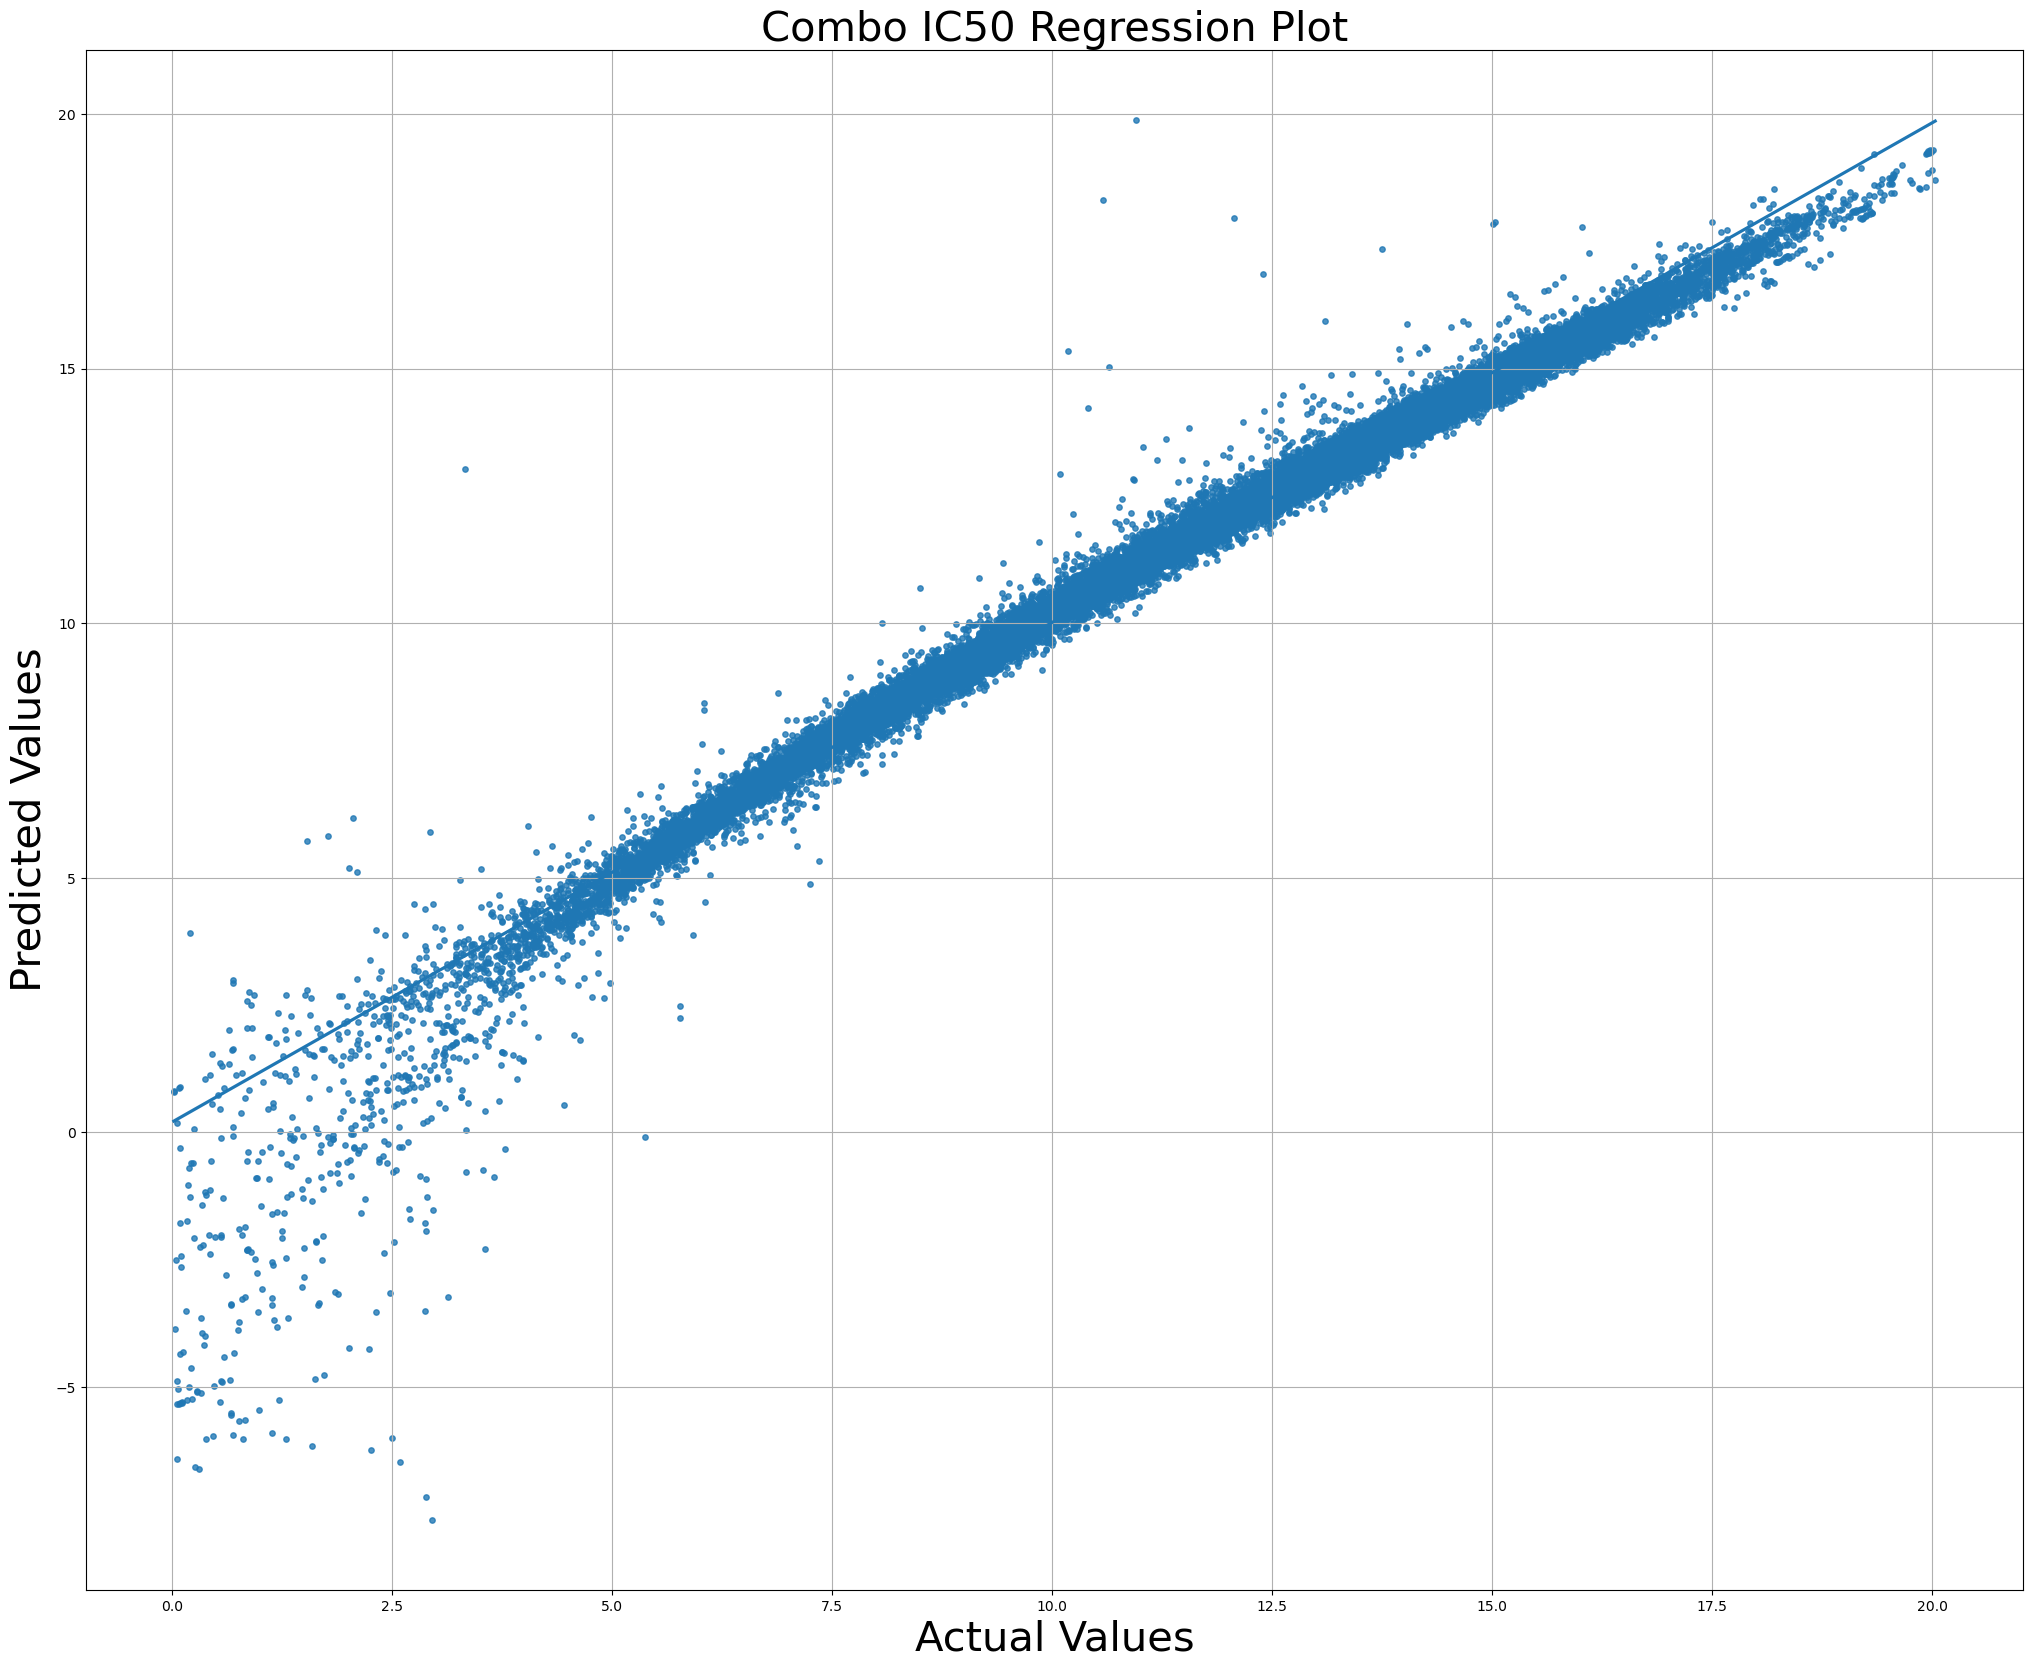

35903 35903


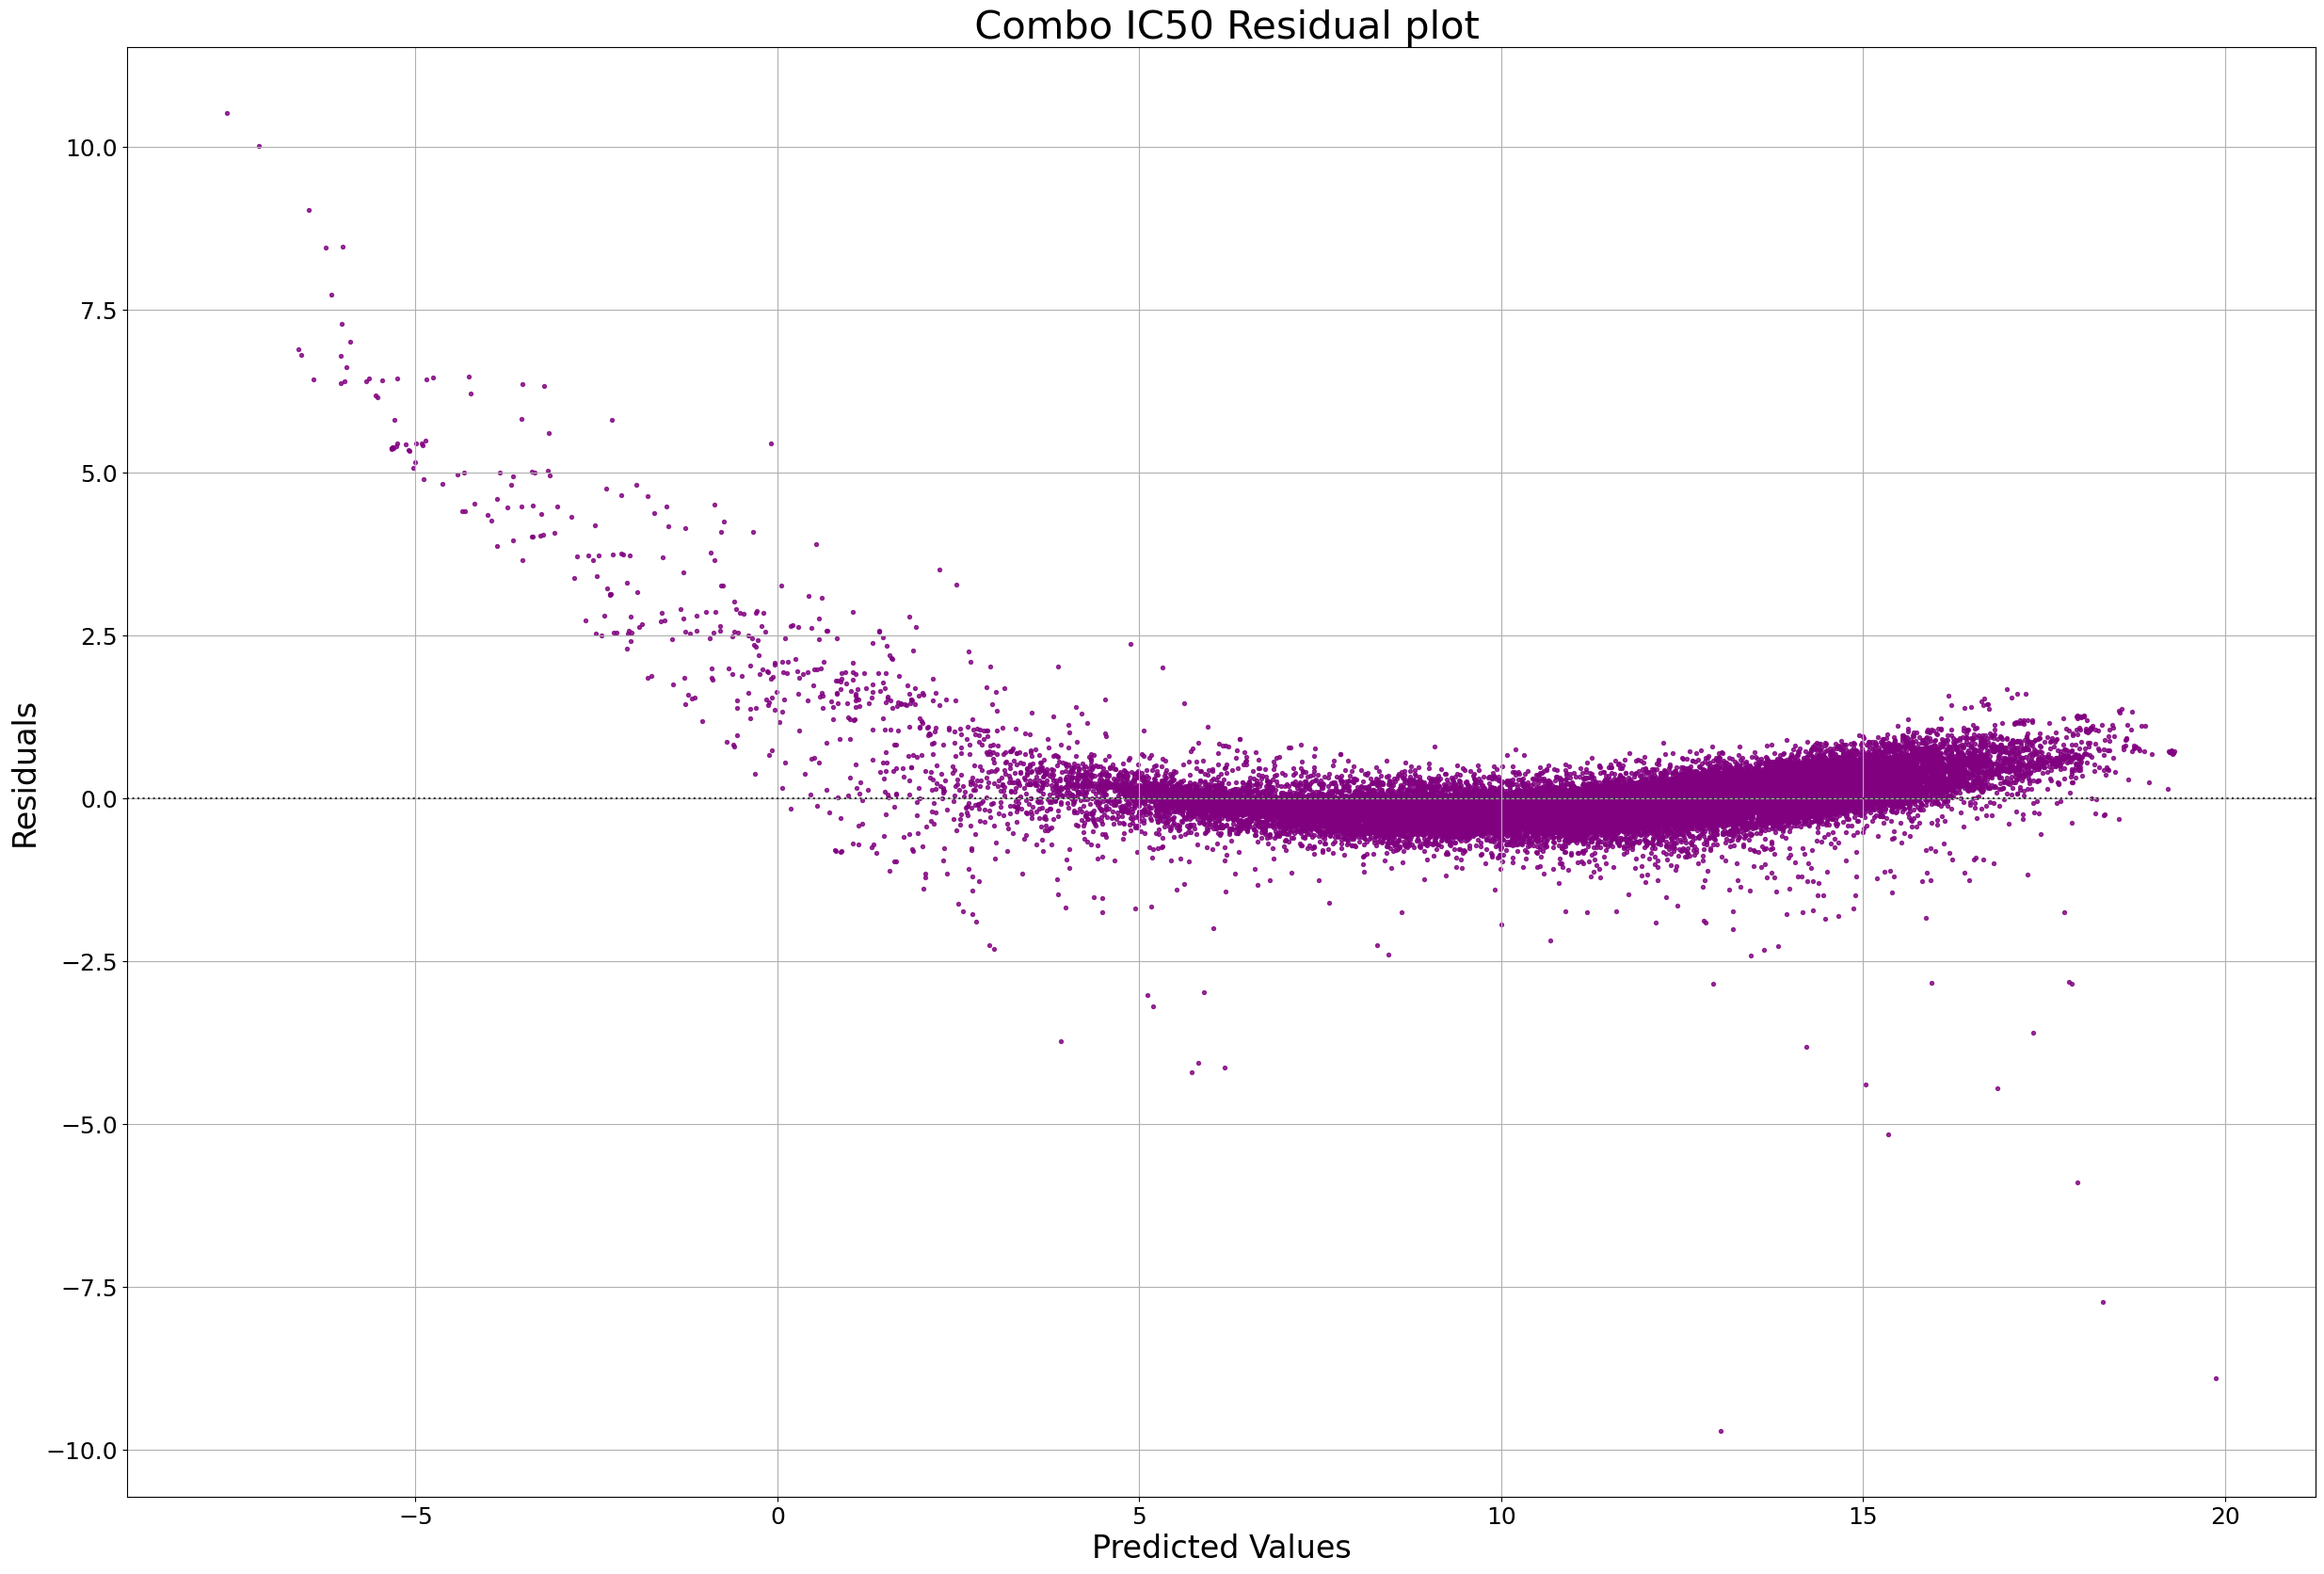

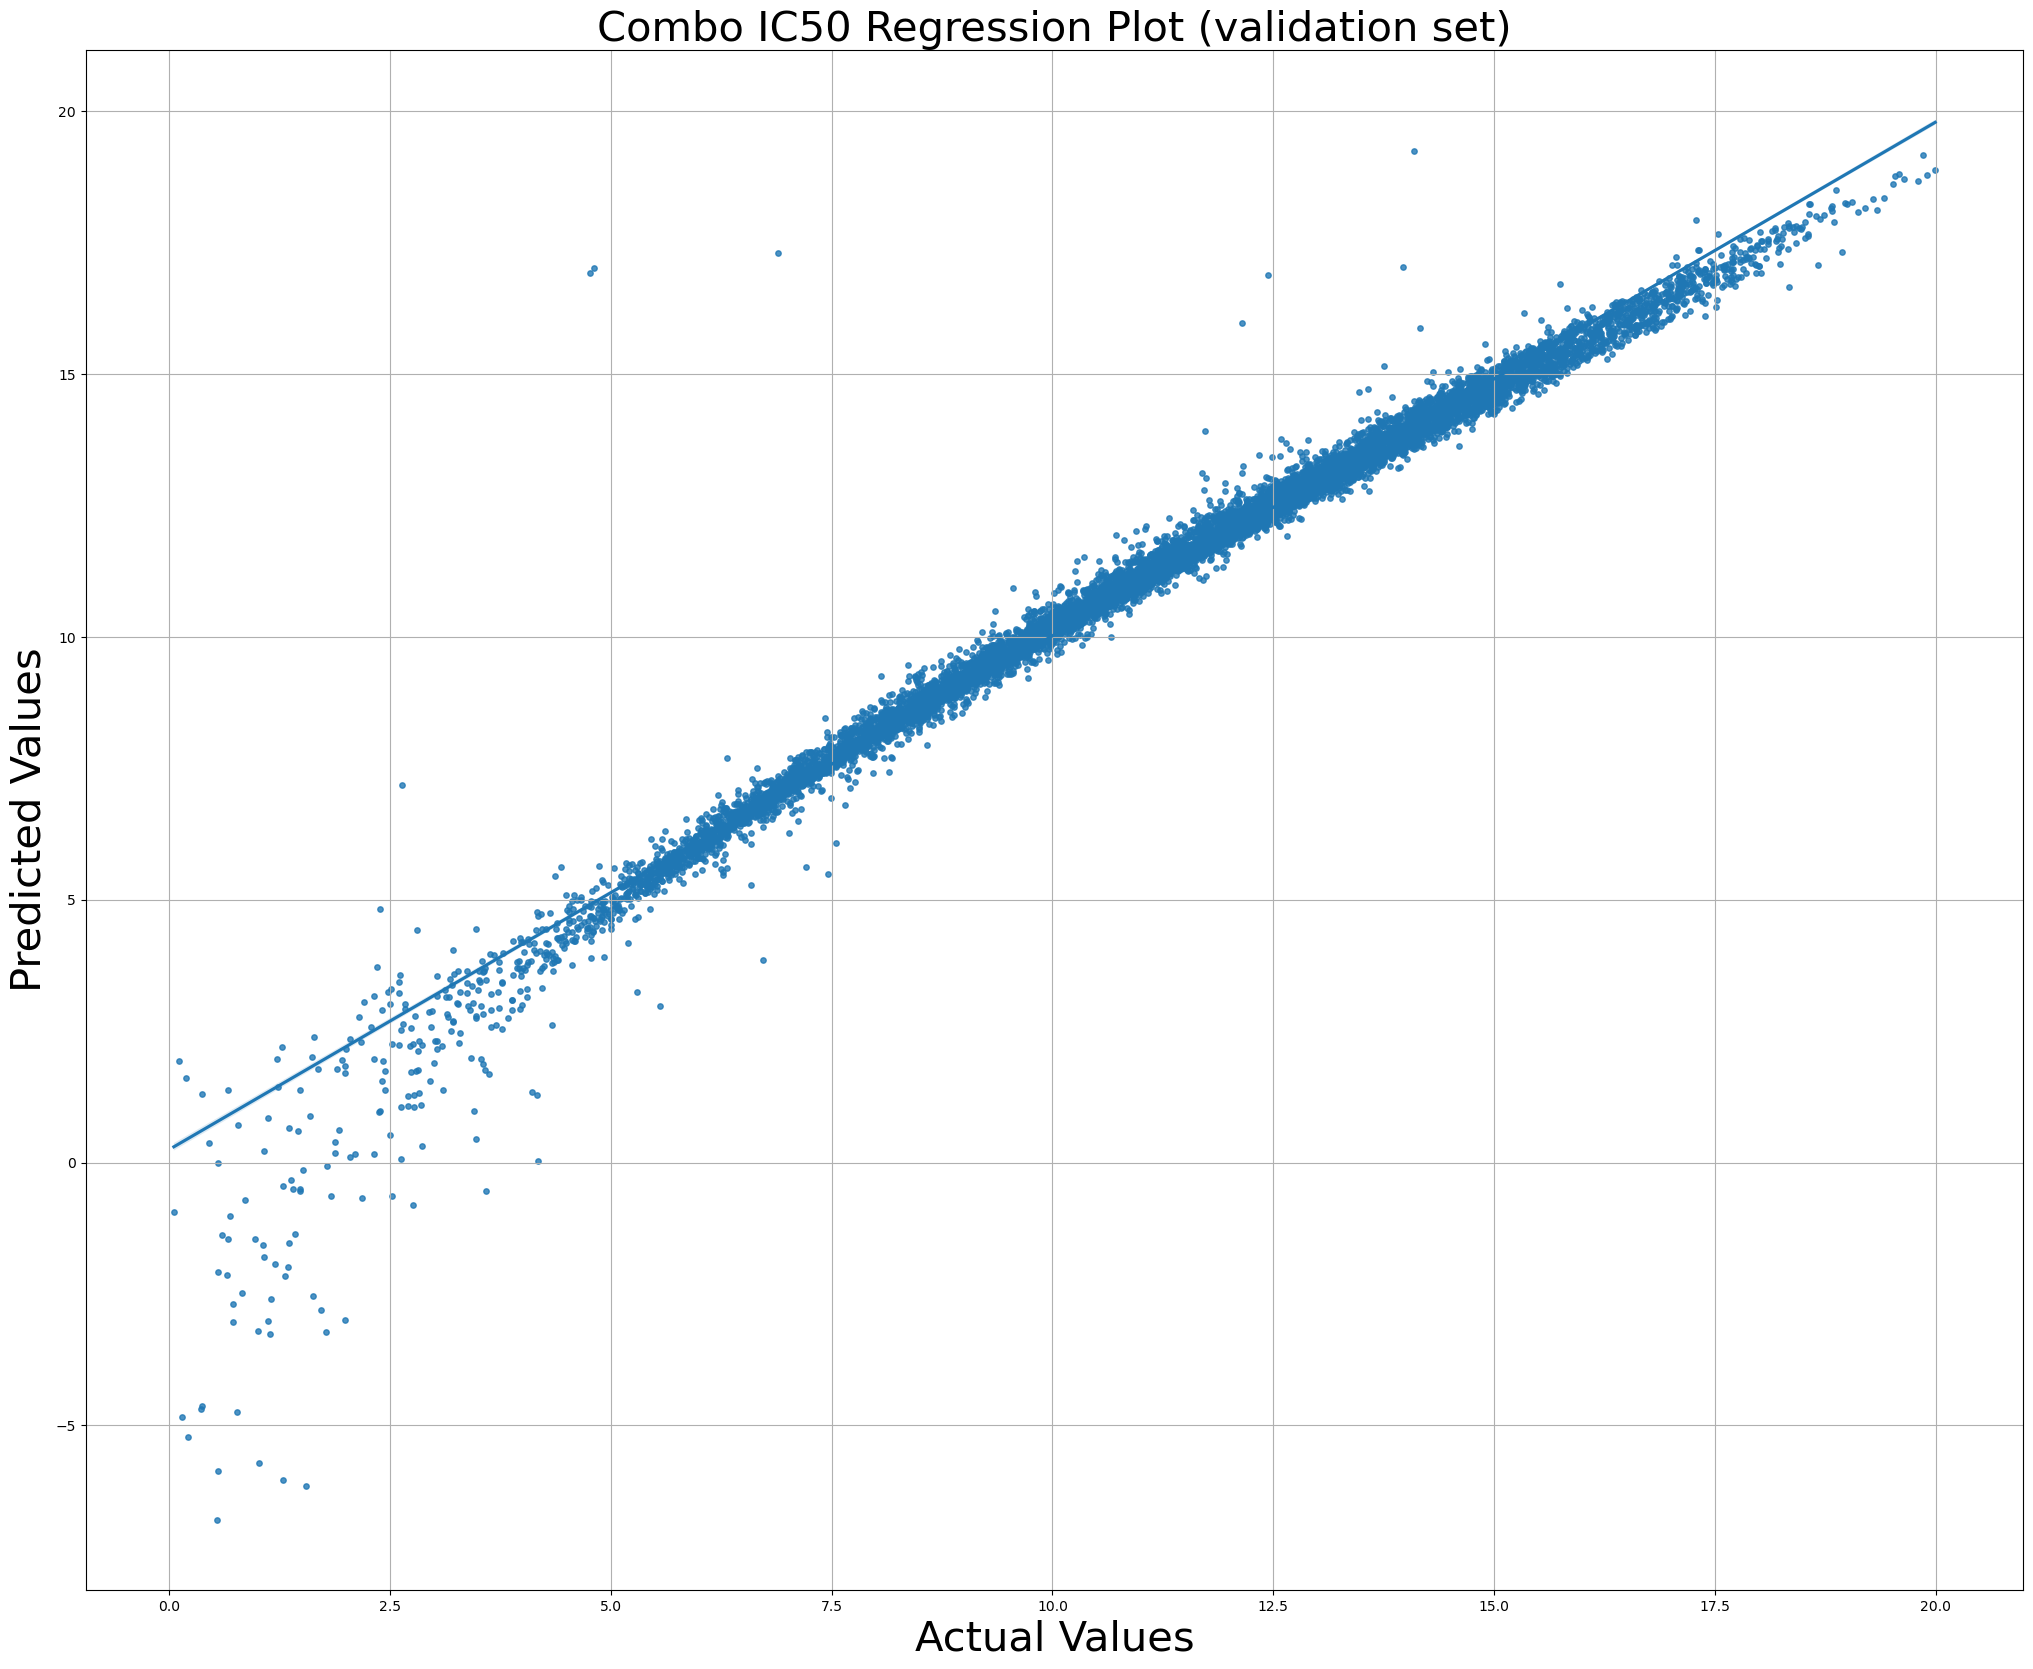

10000 10000


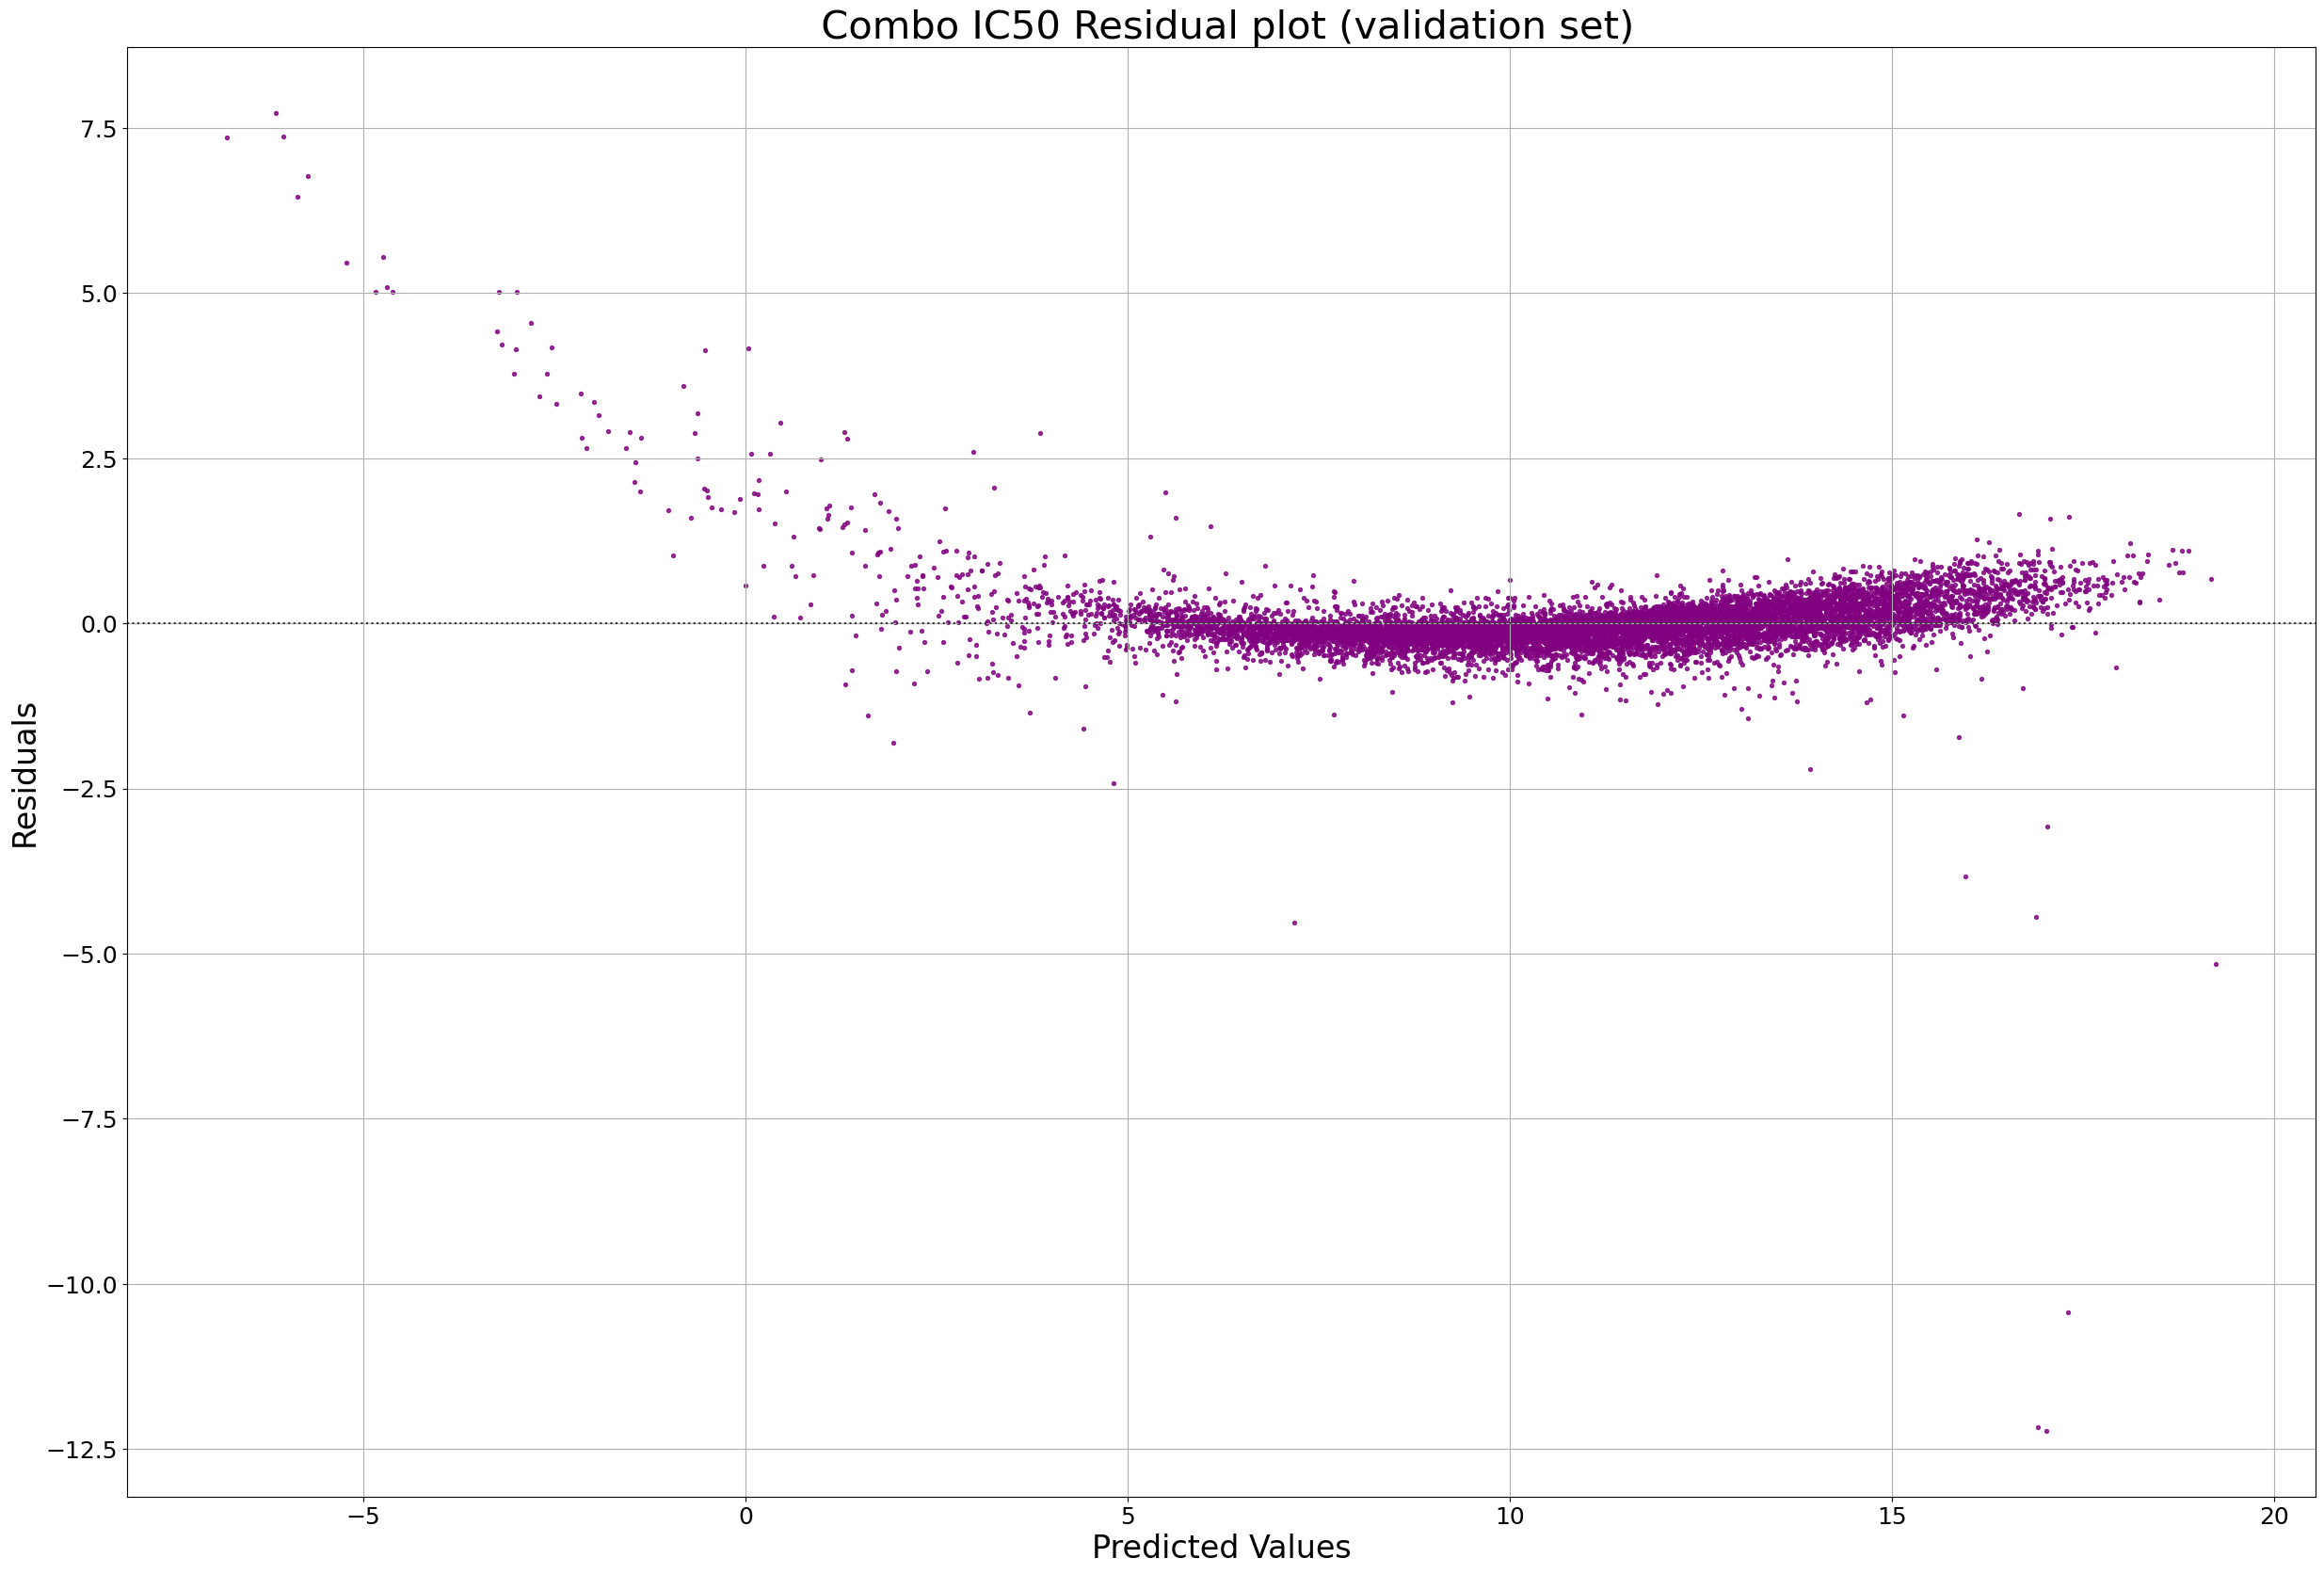

In [6]:
# Make predictions on the test data
Y_pred = ridge_model.predict(X_test)
Y_valid_pred = ridge_model.predict(X_valid)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
import numpy as np
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error:", rmse)
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)
r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)
evs = explained_variance_score(Y_test, Y_pred)
print("Explained Variance Score:", evs)

# for validation set
import numpy as np
mse = mean_squared_error(Y_valid, Y_valid_pred)
print("Mean Squared Error (validation set):", mse)
rmse = np.sqrt(mean_squared_error(Y_valid, Y_valid_pred))
print("Root Mean Squared Error (validation set):", rmse)
mae = mean_absolute_error(Y_valid, Y_valid_pred)
print("Mean Absolute Error (validation set):", mae)
r2 = r2_score(Y_valid, Y_valid_pred)
print("R-squared (validation set):", r2)
evs = explained_variance_score(Y_valid, Y_valid_pred)
print("Explained Variance Score (validation set):", evs)


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=8)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Create a scatterplot with regression line and confidence interval
plt.figure(figsize=(25, 20))  # Adjust the figure size as needed
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'s': 15}, ci=95)

# Add labels and a title
plt.xlabel("Actual Values", fontsize=30)
plt.ylabel("Predicted Values", fontsize=30)
plt.title("Combo IC50 Regression Plot", fontsize=30)

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

# residual plot

Y_test = np.array(Y_test)
Y_test = np.ravel(Y_test)
Y_pred
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Calculate residuals
residuals = Y_test - Y_pred
residuals = pd.DataFrame(residuals)
residuals = np.ravel(residuals)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and residuals 'residuals'
# Replace 'y_pred' and 'residuals' with your actual data

# Check the dimensions of 'y_pred' and 'residuals'
print(len(Y_pred), len(residuals))

# Create a residual plot
plt.figure(figsize=(30, 20))  # Adjust the figure size as needed

# Specify the color for the residual points (e.g., 'lightcoral')
sns.residplot(x=Y_pred, y=residuals, scatter_kws={'s': 8, 'color': 'purple'})

plt.xticks(fontsize=18)  # Adjust the fontsize as needed
plt.yticks(fontsize=18)  # Adjust the fontsize as needed

# Add labels and a title with increased font size
plt.xlabel("Predicted Values", fontsize=24)  # Adjust fontsize as needed
plt.ylabel("Residuals", fontsize=24)  # Adjust fontsize as needed
plt.title(" Combo IC50 Residual plot", fontsize=30)  # Adjust fontsize as needed

# Show the grid
plt.grid(True)

# Show the plot
plt.show()


# validation data plots

# plots for validation set
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Create a scatterplot with regression line and confidence interval
plt.figure(figsize=(25, 20))  # Adjust the figure size as needed
sns.regplot(x=Y_valid, y=Y_valid_pred, scatter_kws={'s': 15}, ci=95)

# Add labels and a title
plt.xlabel("Actual Values", fontsize=30)
plt.ylabel("Predicted Values", fontsize=30)
plt.title("Combo IC50 Regression Plot (validation set)", fontsize=30)

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

# residual plot

Y_valid = np.array(Y_valid)
Y_valid = np.ravel(Y_valid)
Y_valid_pred
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Calculate residuals
residuals = Y_valid - Y_valid_pred
residuals = pd.DataFrame(residuals)
residuals = np.ravel(residuals)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and residuals 'residuals'
# Replace 'y_pred' and 'residuals' with your actual data

# Check the dimensions of 'y_pred' and 'residuals'
print(len(Y_valid_pred), len(residuals))

# Create a residual plot
plt.figure(figsize=(30, 20))  # Adjust the figure size as needed

# Specify the color for the residual points (e.g., 'lightcoral')
sns.residplot(x=Y_valid_pred, y=residuals, scatter_kws={'s': 8, 'color': 'purple'})

plt.xticks(fontsize=18)  # Adjust the fontsize as needed
plt.yticks(fontsize=18)  # Adjust the fontsize as needed

# Add labels and a title with increased font size
plt.xlabel("Predicted Values", fontsize=24)  # Adjust fontsize as needed
plt.ylabel("Residuals", fontsize=24)  # Adjust fontsize as needed
plt.title(" Combo IC50 Residual plot (validation set)", fontsize=30)  # Adjust fontsize as needed

# Show the grid
plt.grid(True)

# Show the plot
plt.show()


In [7]:
# creating  x and y
# Separate the input features (X) and target labels (Y)
X = concatenated_df.drop('Combo IC50', axis = 1)  # Replace 'target_column_name' with the actual column name of the target variable
Y = concatenated_df['Combo IC50']

X_valid = valid_data.drop('Combo IC50', axis = 1)
Y_valid = valid_data['Combo IC50']
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=4002)
# Create and train the Ridge regression model
alpha = 20  # You can adjust the regularization strength (alpha) as needed
ridge_model1 = Ridge(alpha=alpha, fit_intercept=True)
ridge_model1.fit(X_train, Y_train)


Ridge(alpha=20)

Mean Squared Error: 0.22374551725480477
Root Mean Squared Error: 0.4730174597779714
Mean Absolute Error: 0.2580733645973771
R-squared: 0.9797967441167048
Explained Variance Score: 0.9797972455573327
Mean Squared Error (validation set): 0.23387414557354547
Root Mean Squared Error (validation set): 0.4836053613986775
Mean Absolute Error (validation set): 0.2574767800447228
R-squared (validation set): 0.9790600488138613
Explained Variance Score (validation set): 0.9790600552080202
Cross-Validation Scores: [0.98100969 0.97928717 0.97698105 0.98159414 0.97917299 0.97928139
 0.98040538 0.97851529]


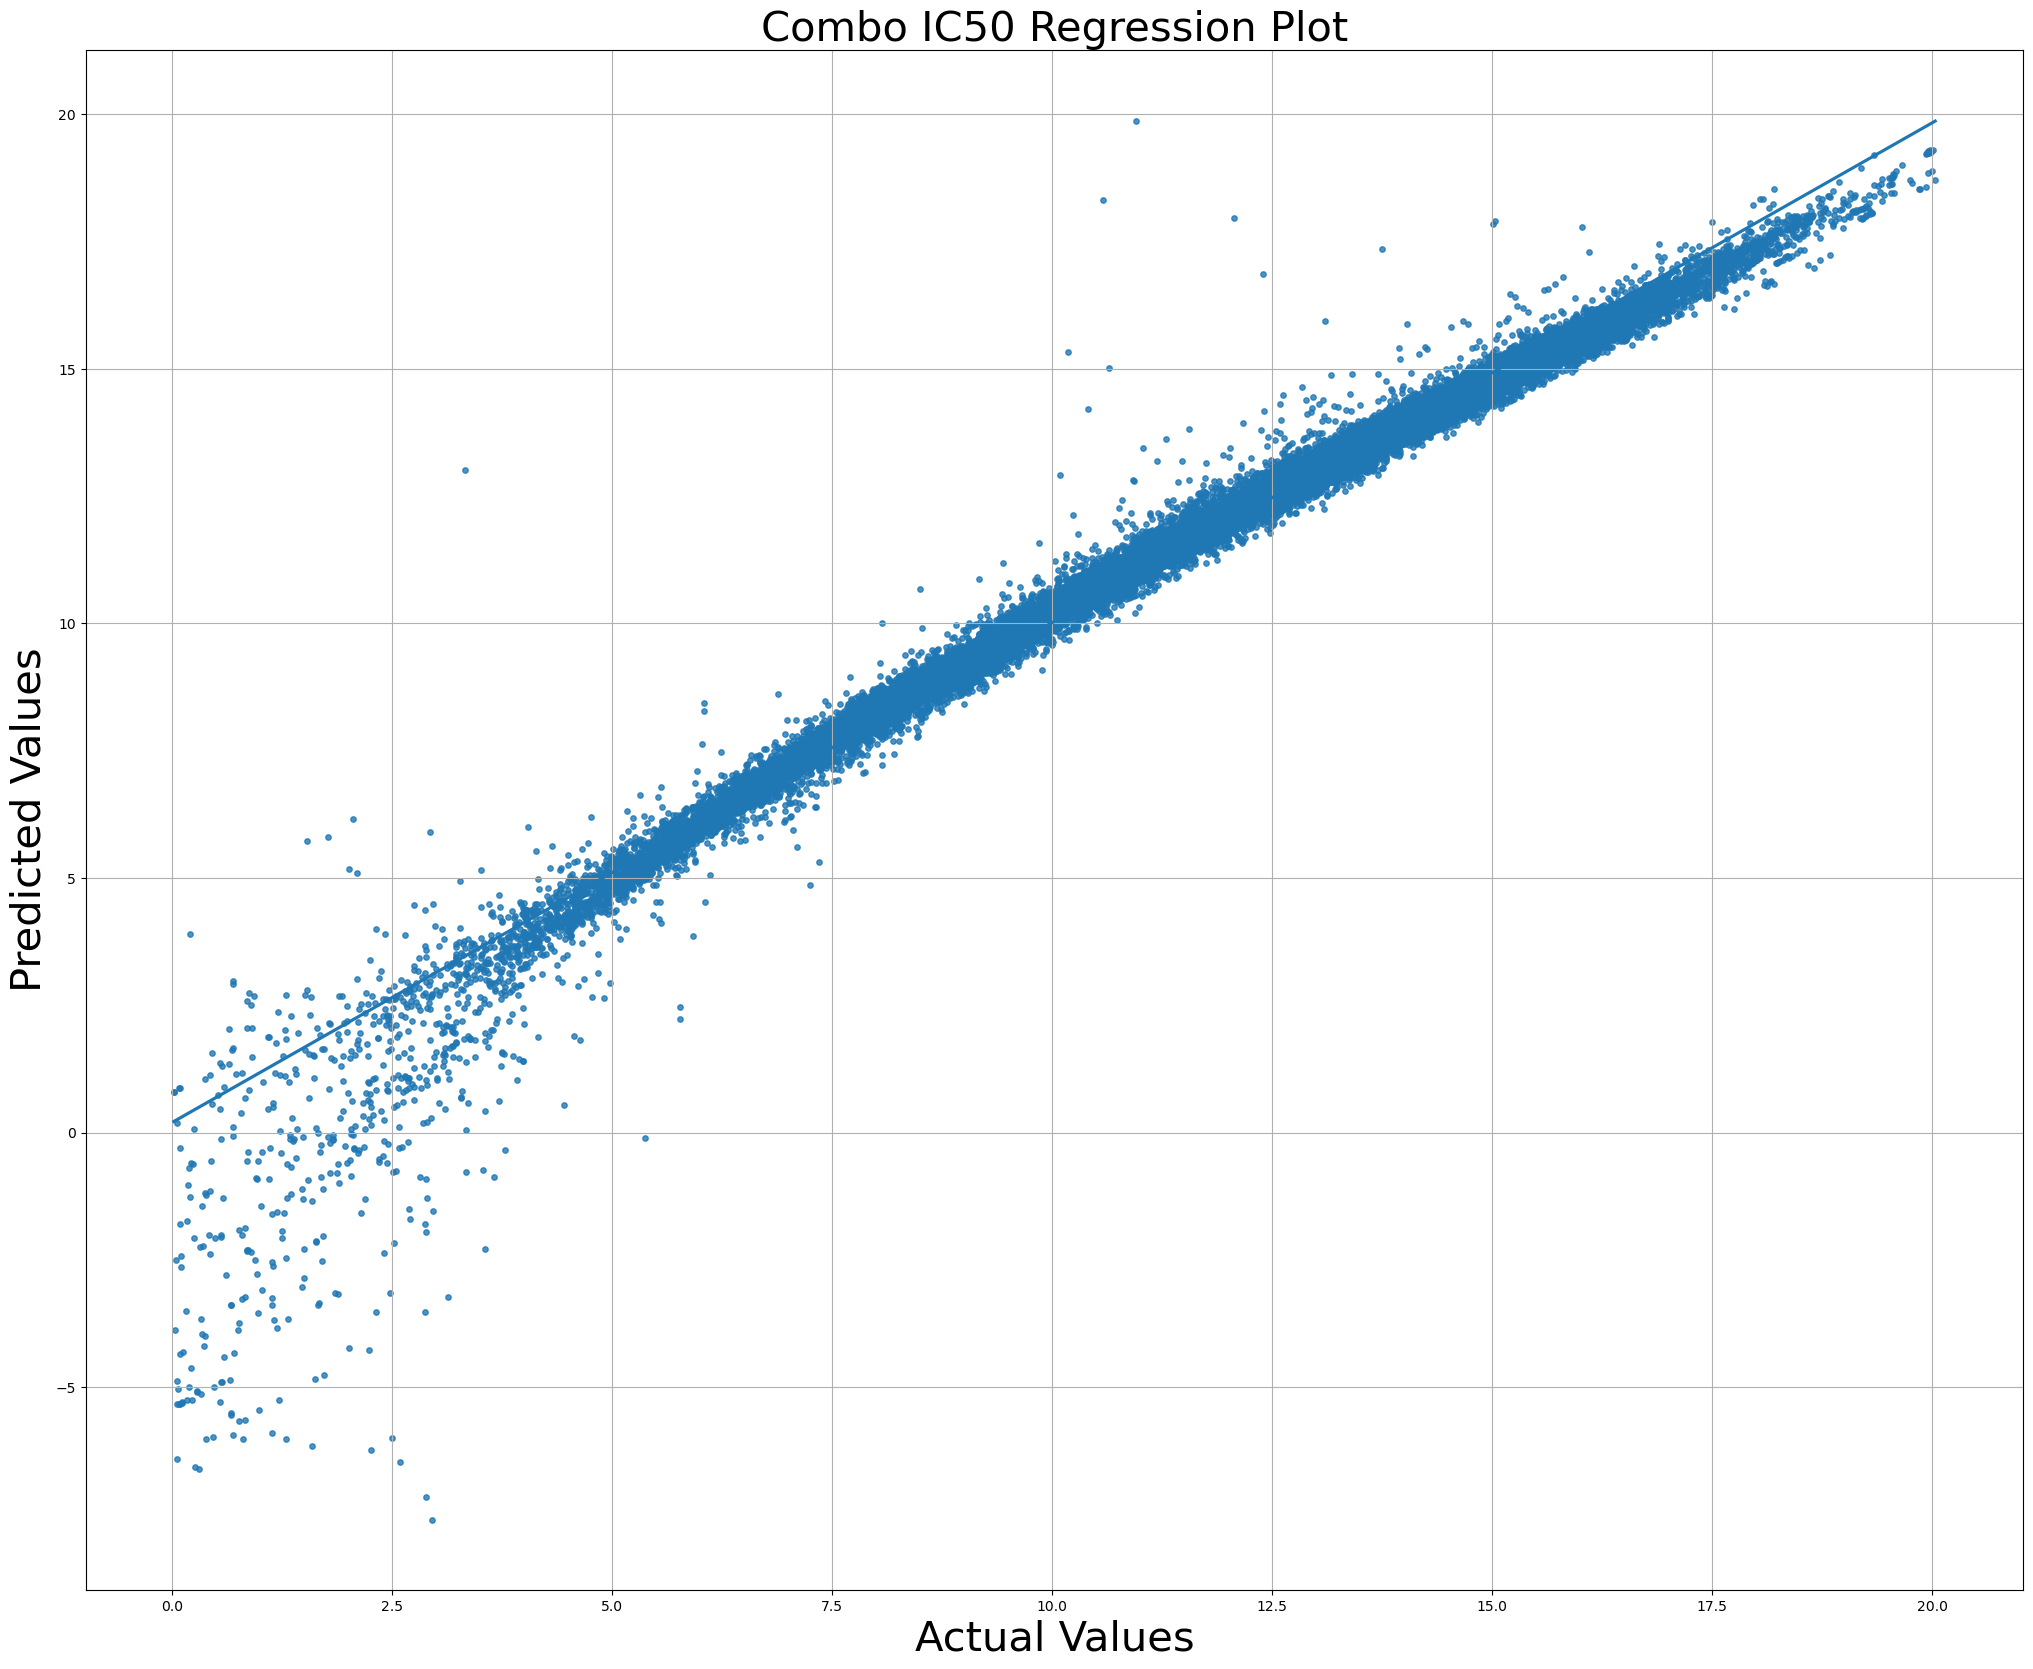

35903 35903


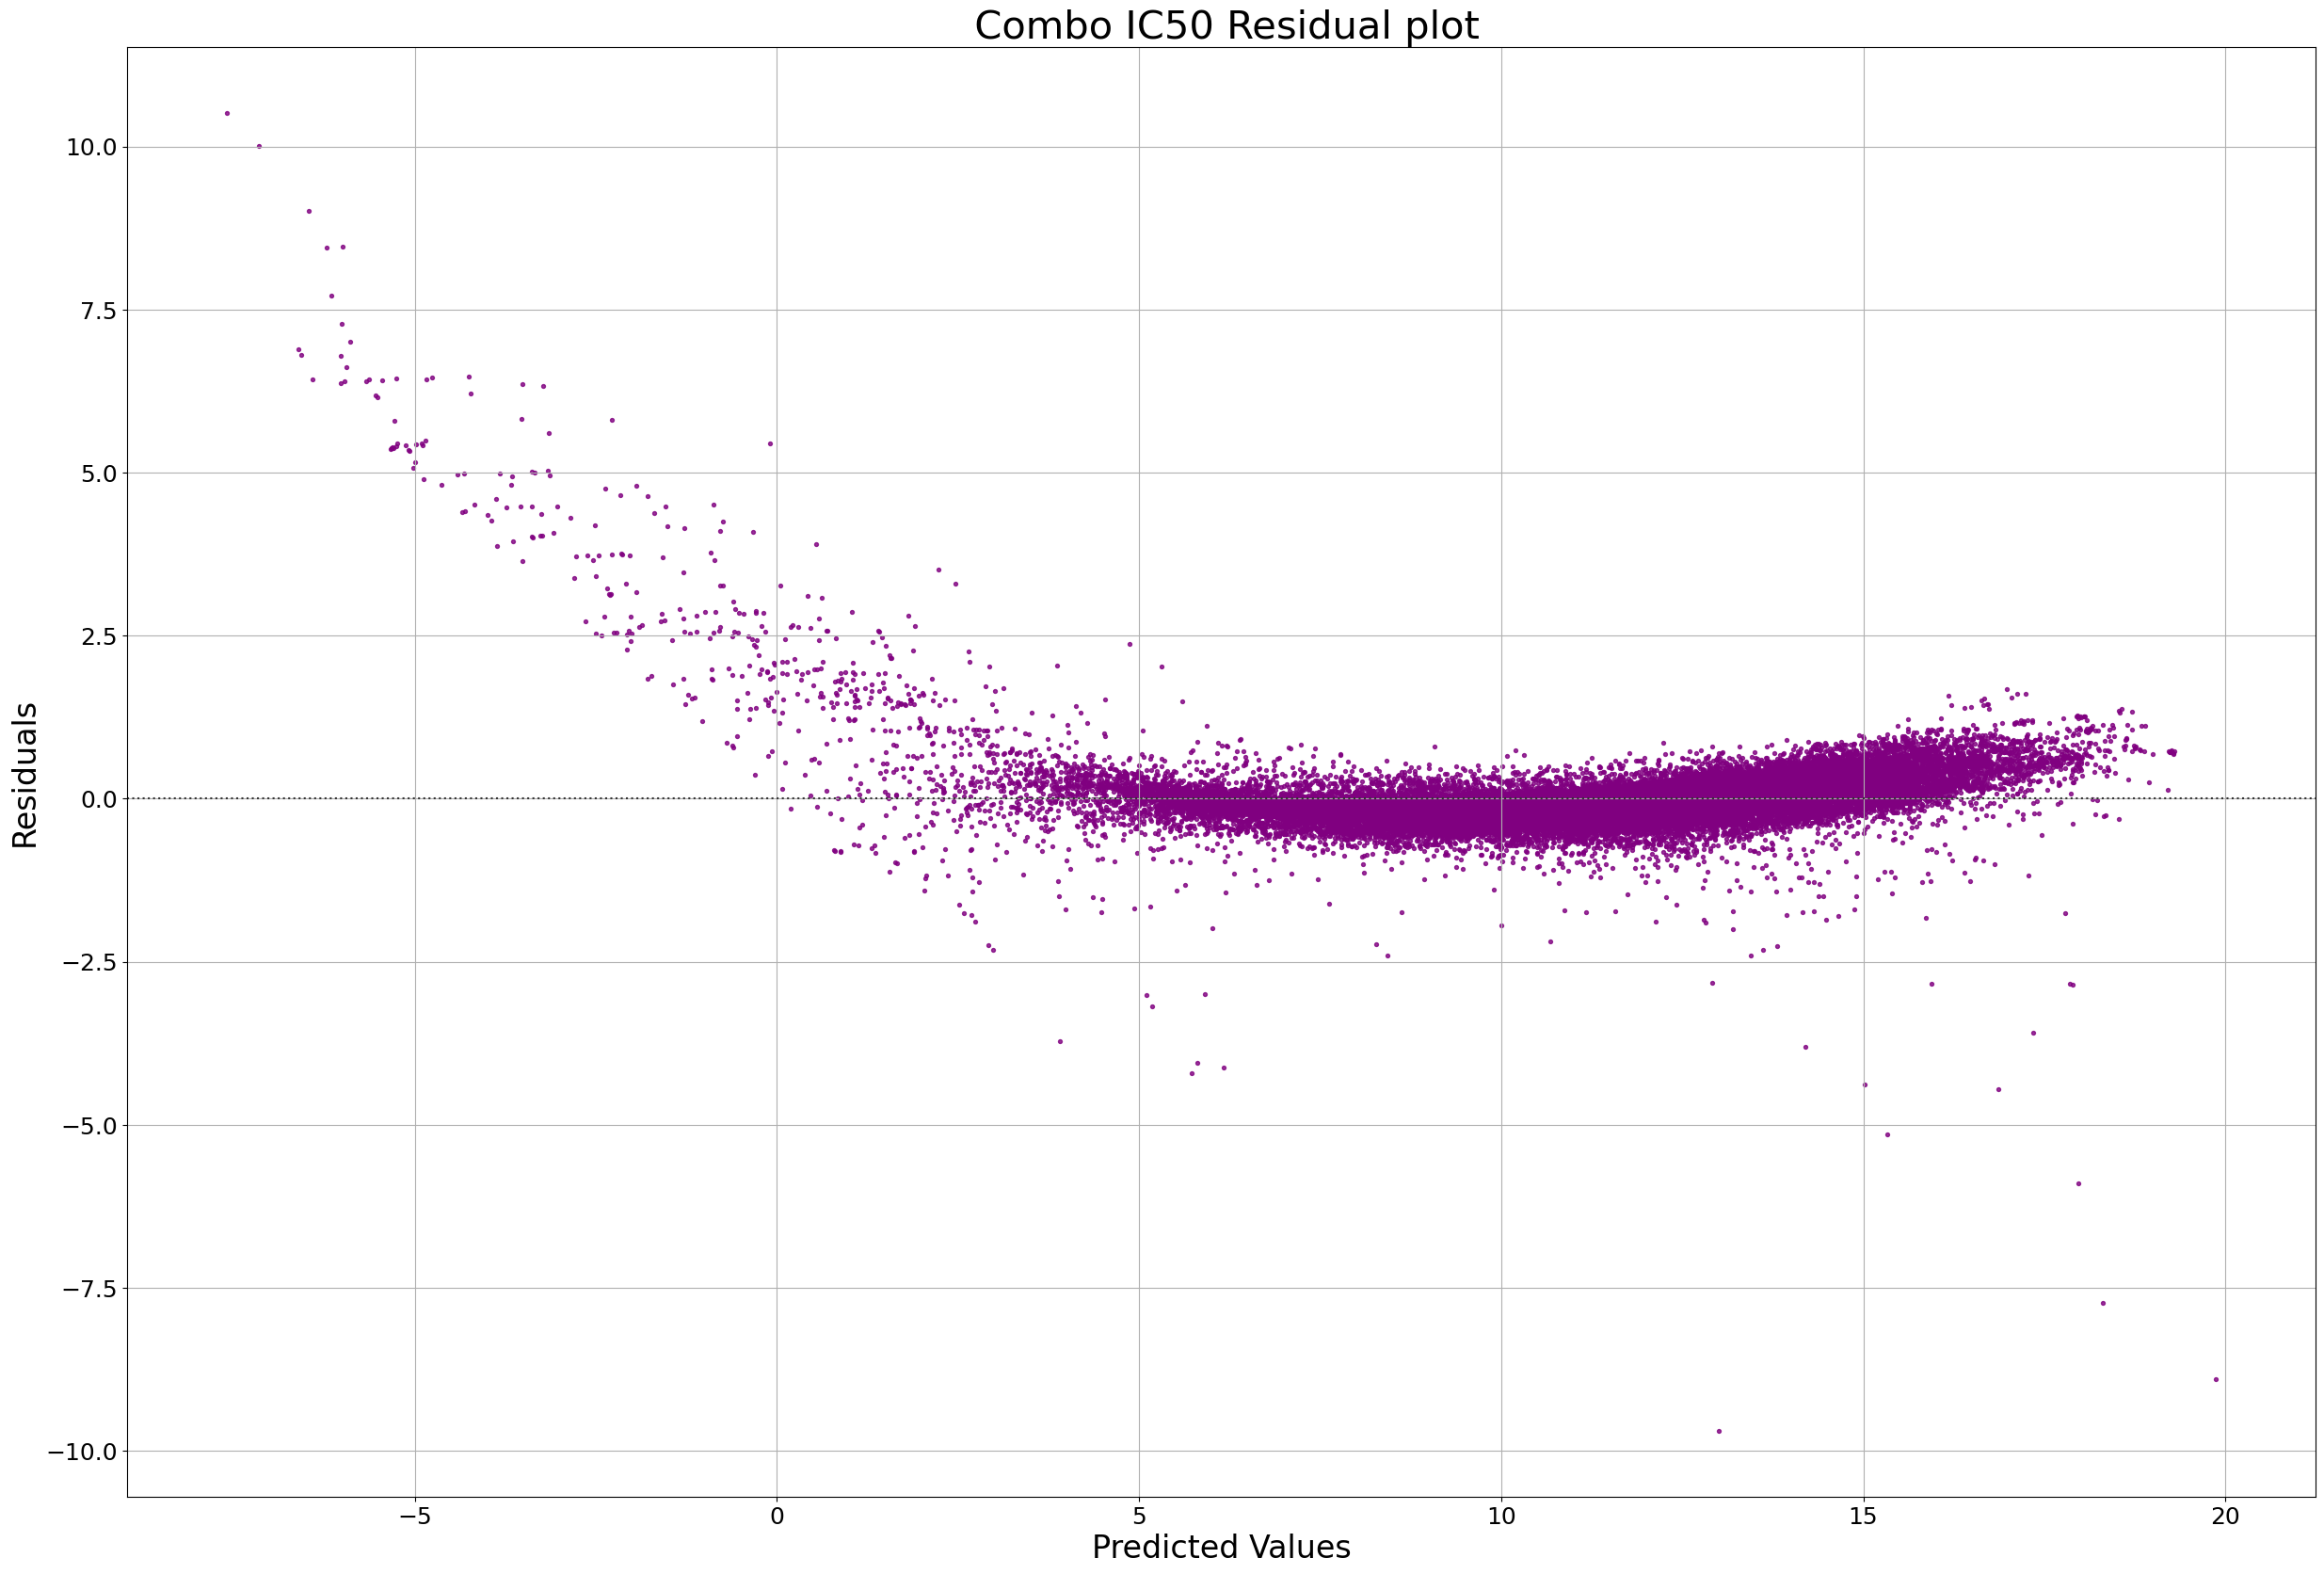

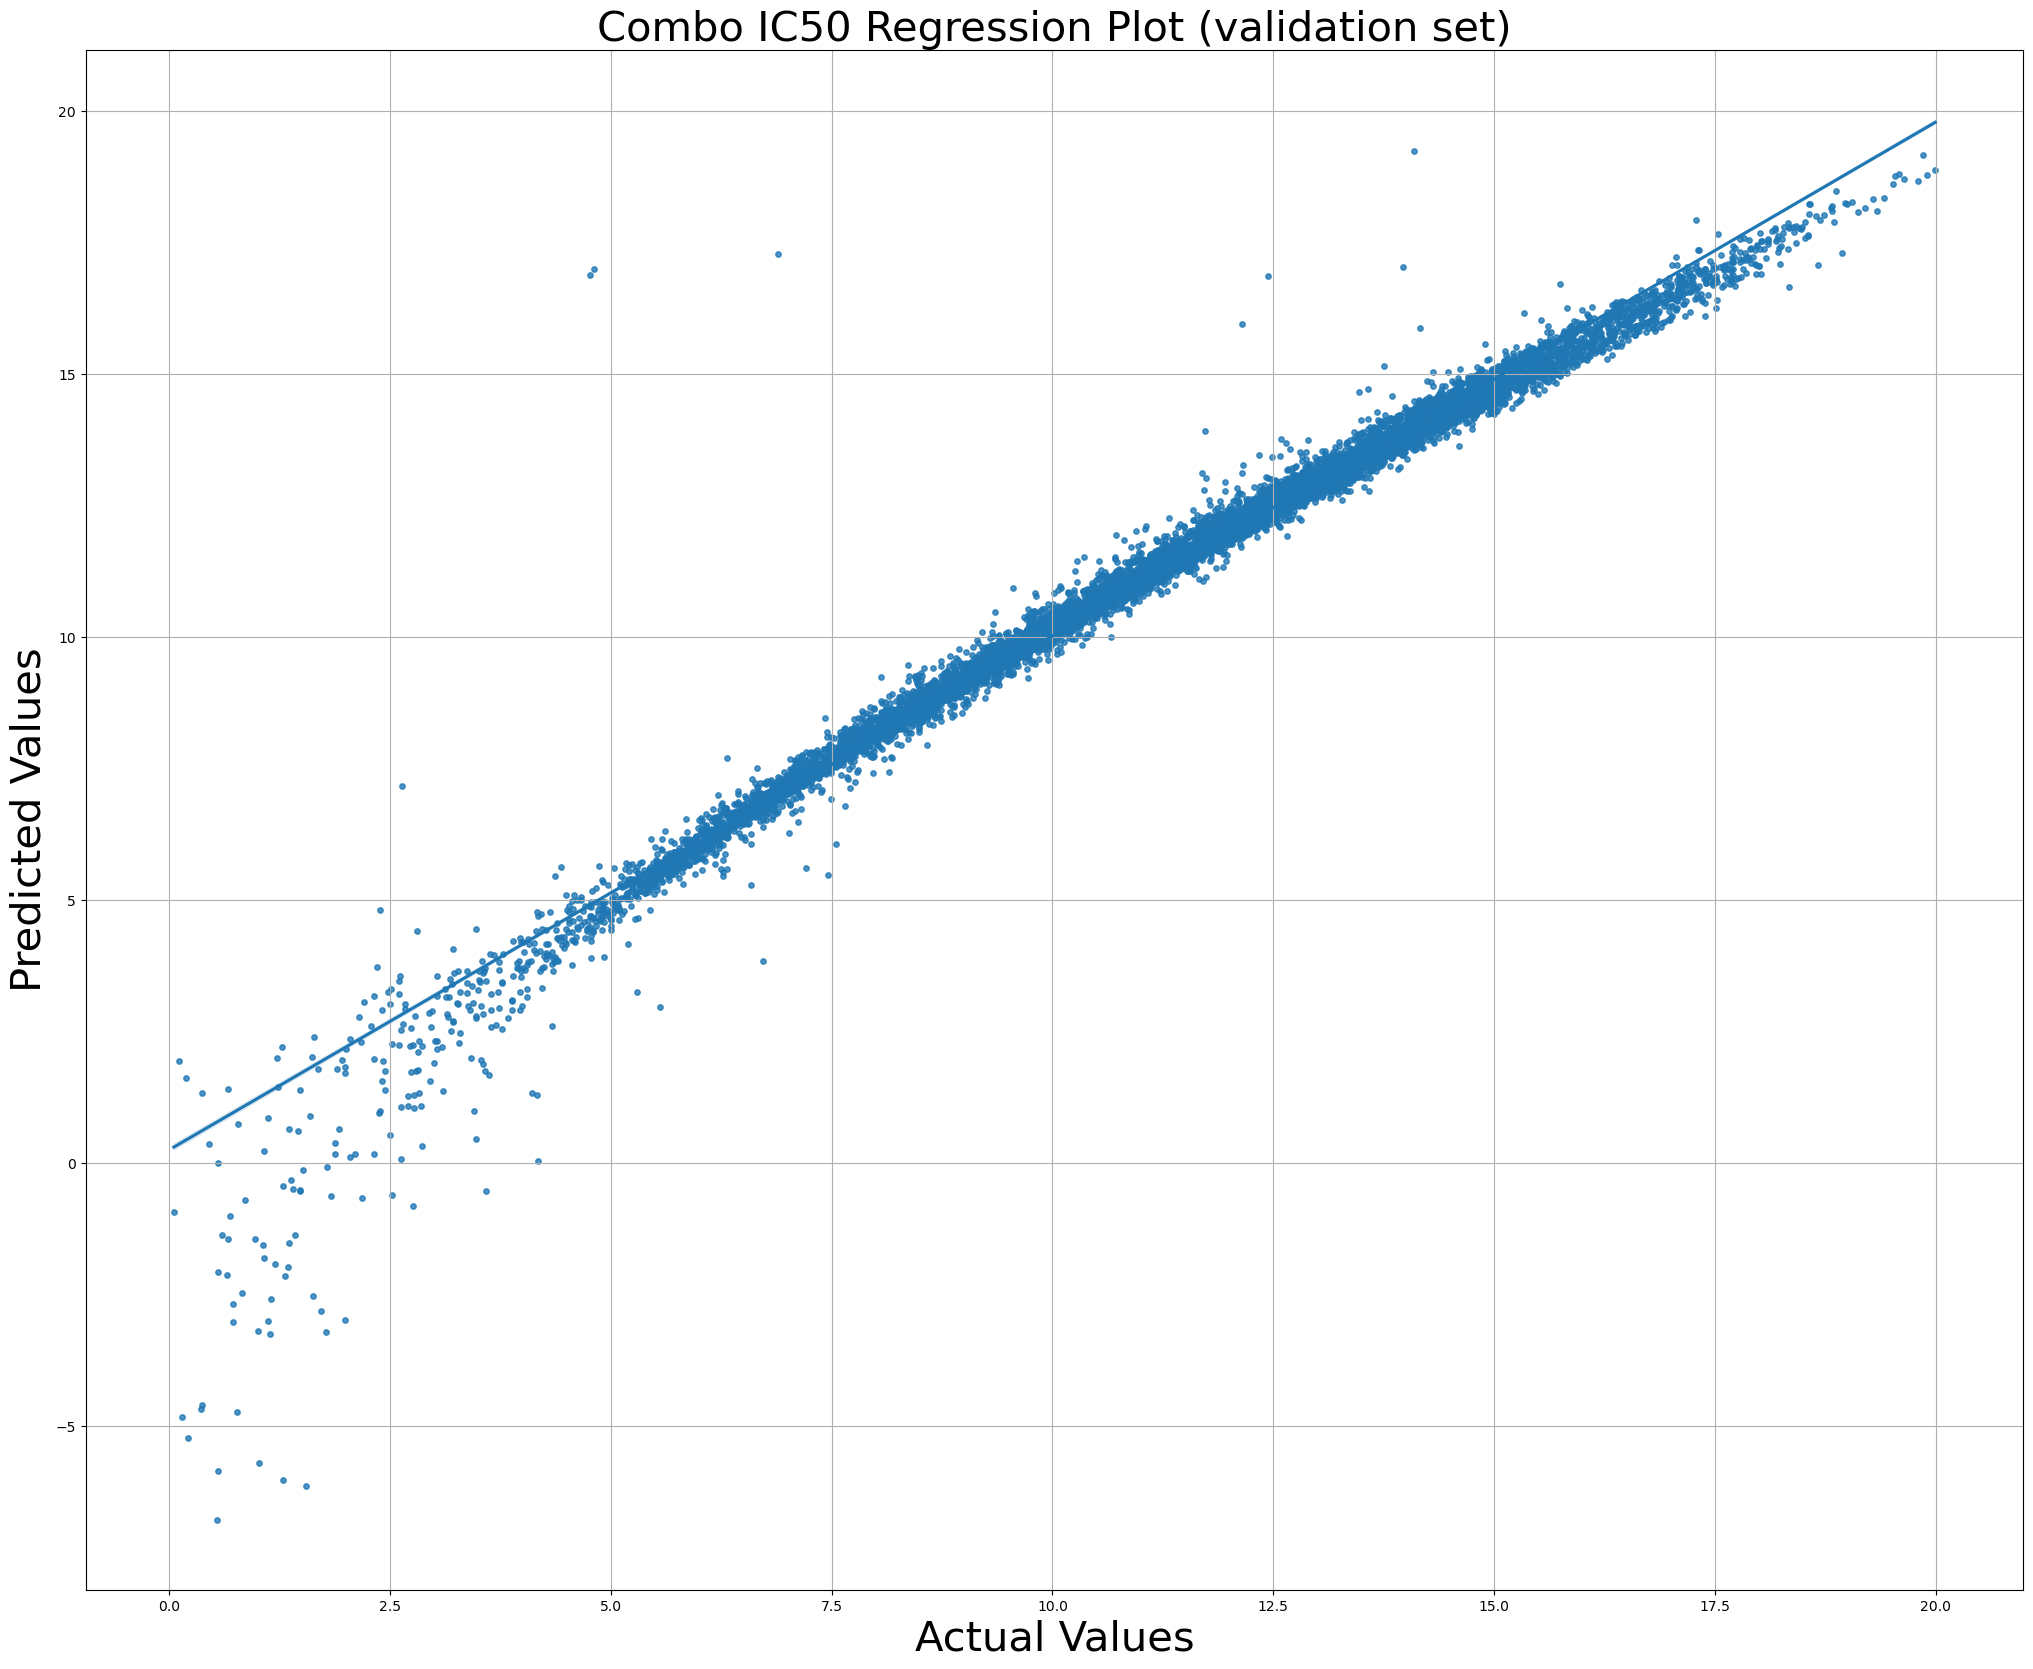

10000 10000


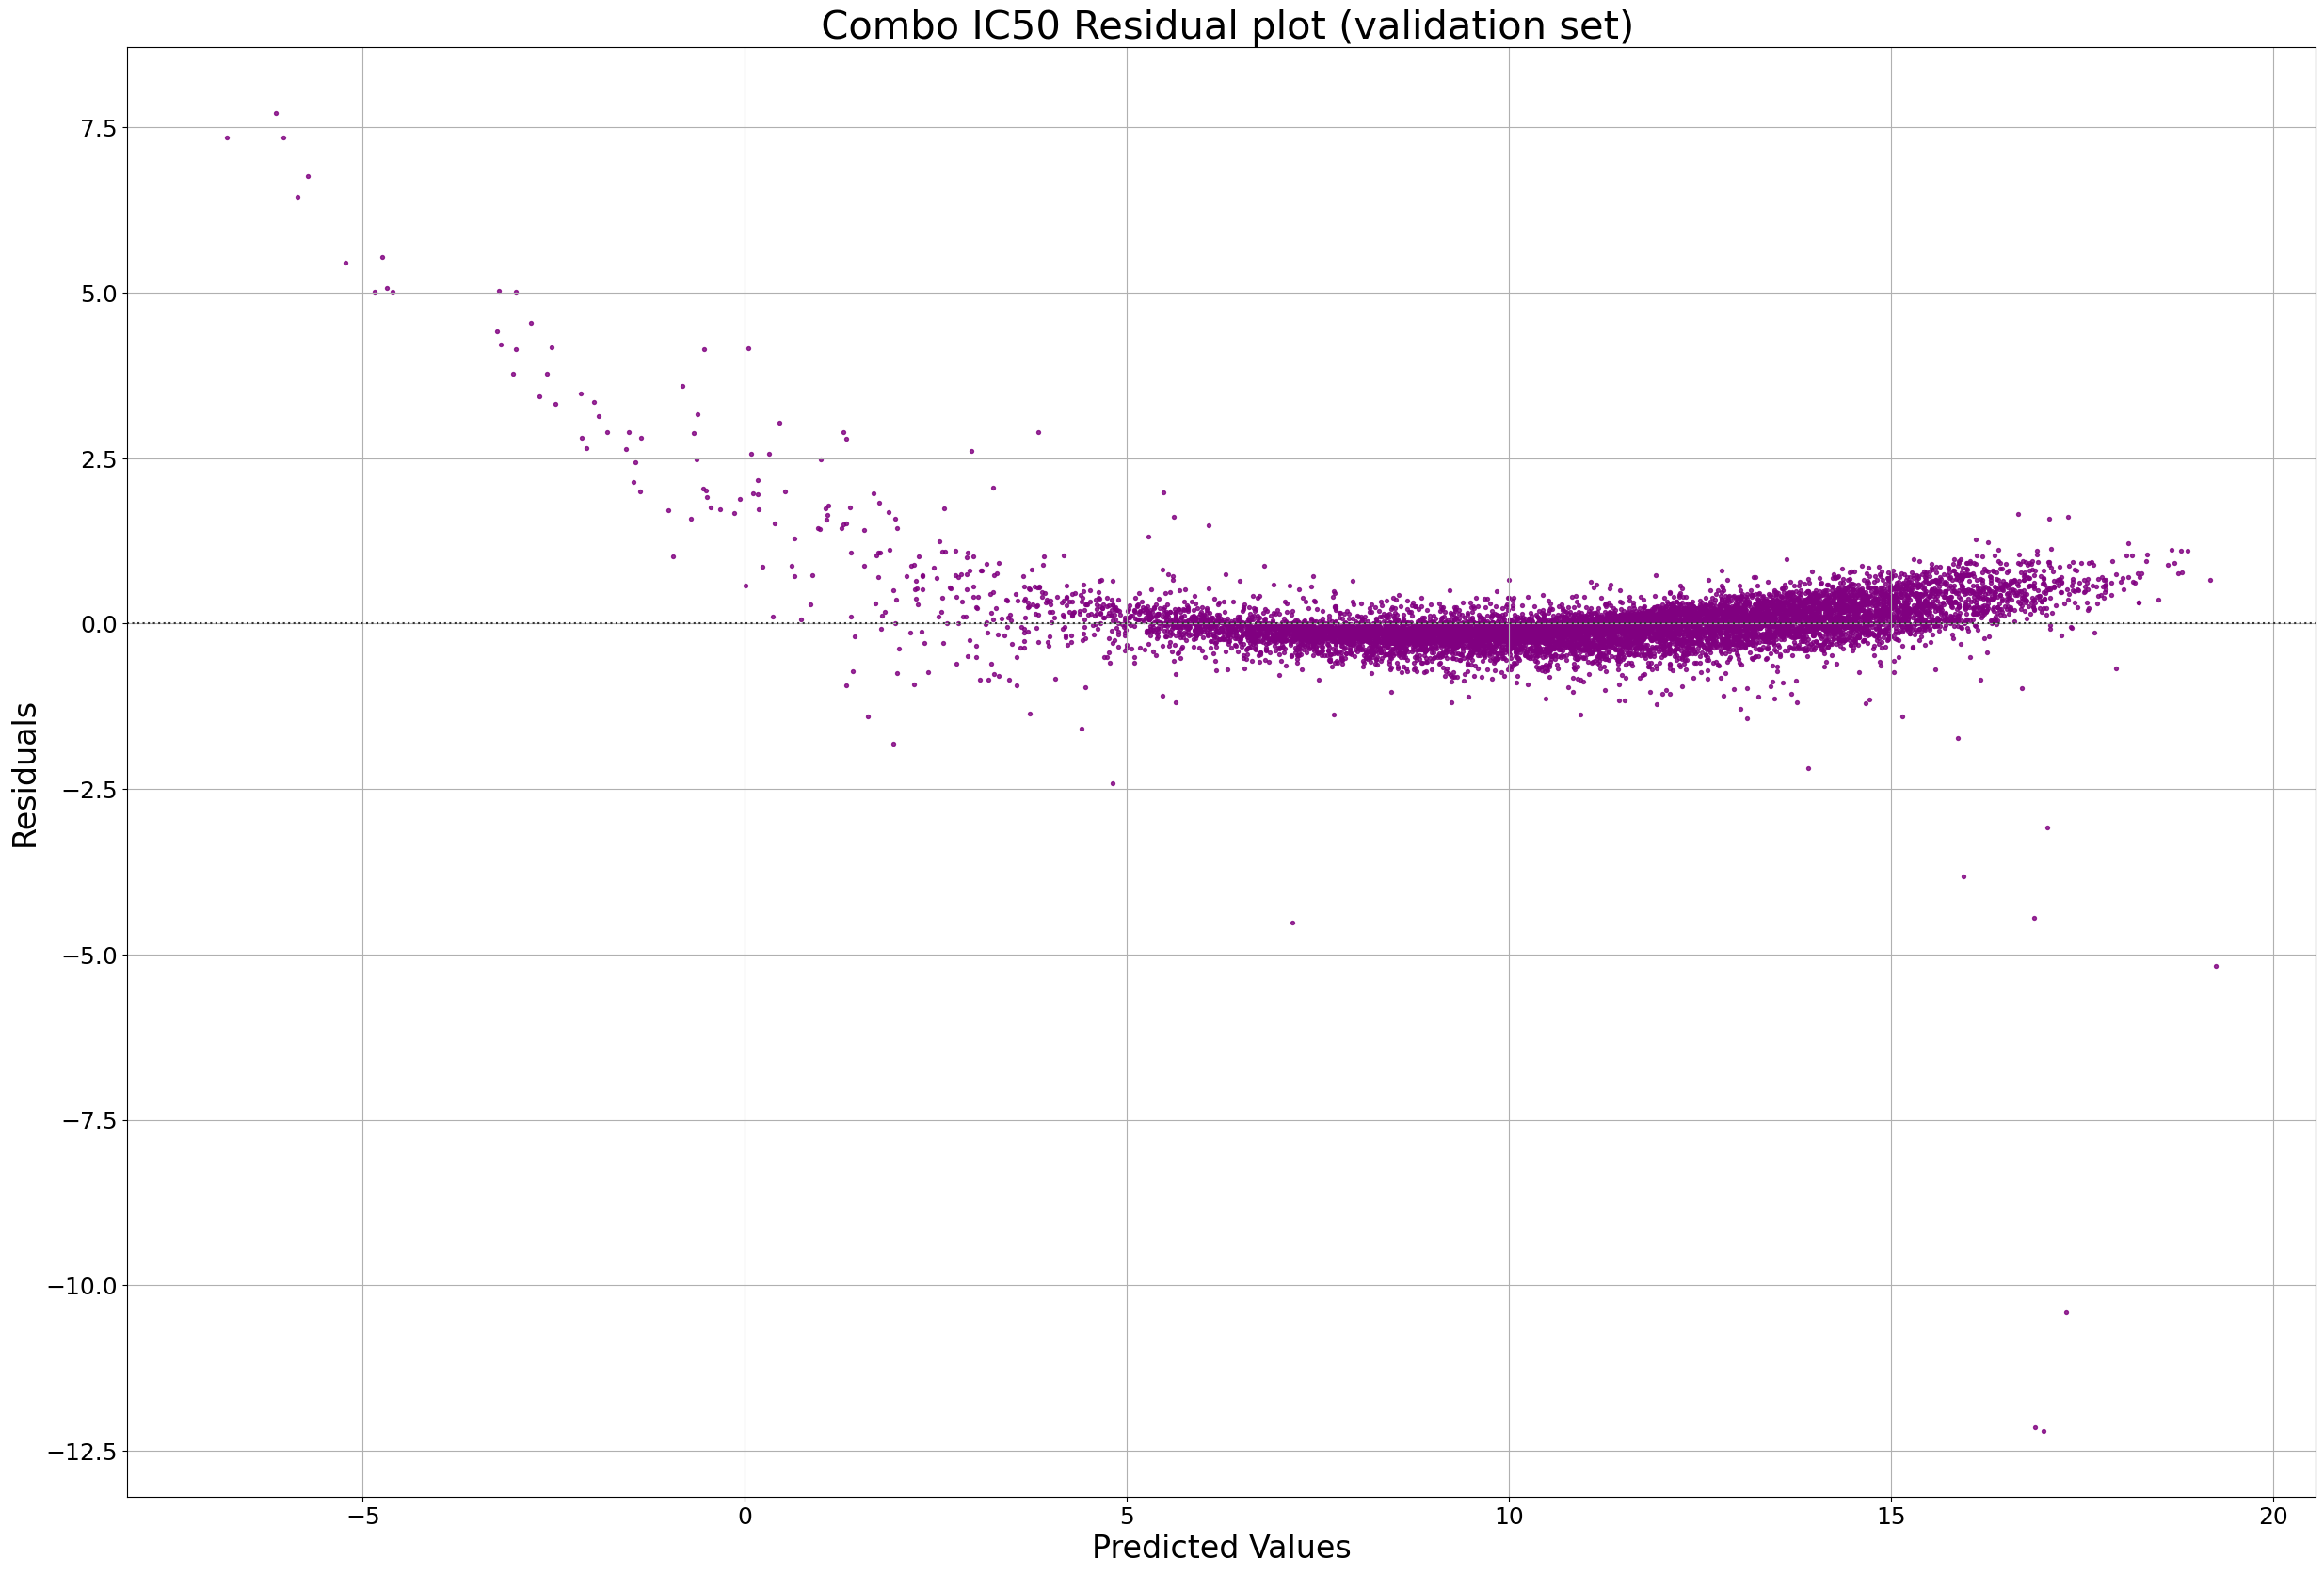

In [8]:
# Make predictions on the test data
Y_pred = ridge_model1.predict(X_test)
Y_valid_pred = ridge_model1.predict(X_valid)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
import numpy as np
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error:", rmse)
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)
r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)
evs = explained_variance_score(Y_test, Y_pred)
print("Explained Variance Score:", evs)

# for validation set
import numpy as np
mse = mean_squared_error(Y_valid, Y_valid_pred)
print("Mean Squared Error (validation set):", mse)
rmse = np.sqrt(mean_squared_error(Y_valid, Y_valid_pred))
print("Root Mean Squared Error (validation set):", rmse)
mae = mean_absolute_error(Y_valid, Y_valid_pred)
print("Mean Absolute Error (validation set):", mae)
r2 = r2_score(Y_valid, Y_valid_pred)
print("R-squared (validation set):", r2)
evs = explained_variance_score(Y_valid, Y_valid_pred)
print("Explained Variance Score (validation set):", evs)


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=8)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Create a scatterplot with regression line and confidence interval
plt.figure(figsize=(25, 20))  # Adjust the figure size as needed
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'s': 15}, ci=95)

# Add labels and a title
plt.xlabel("Actual Values", fontsize=30)
plt.ylabel("Predicted Values", fontsize=30)
plt.title("Combo IC50 Regression Plot", fontsize=30)

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

# residual plot

Y_test = np.array(Y_test)
Y_test = np.ravel(Y_test)
Y_pred
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Calculate residuals
residuals = Y_test - Y_pred
residuals = pd.DataFrame(residuals)
residuals = np.ravel(residuals)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and residuals 'residuals'
# Replace 'y_pred' and 'residuals' with your actual data

# Check the dimensions of 'y_pred' and 'residuals'
print(len(Y_pred), len(residuals))

# Create a residual plot
plt.figure(figsize=(30, 20))  # Adjust the figure size as needed

# Specify the color for the residual points (e.g., 'lightcoral')
sns.residplot(x=Y_pred, y=residuals, scatter_kws={'s': 8, 'color': 'purple'})

plt.xticks(fontsize=18)  # Adjust the fontsize as needed
plt.yticks(fontsize=18)  # Adjust the fontsize as needed

# Add labels and a title with increased font size
plt.xlabel("Predicted Values", fontsize=24)  # Adjust fontsize as needed
plt.ylabel("Residuals", fontsize=24)  # Adjust fontsize as needed
plt.title(" Combo IC50 Residual plot", fontsize=30)  # Adjust fontsize as needed

# Show the grid
plt.grid(True)

# Show the plot
plt.show()


# validation data plots

# plots for validation set
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Create a scatterplot with regression line and confidence interval
plt.figure(figsize=(25, 20))  # Adjust the figure size as needed
sns.regplot(x=Y_valid, y=Y_valid_pred, scatter_kws={'s': 15}, ci=95)

# Add labels and a title
plt.xlabel("Actual Values", fontsize=30)
plt.ylabel("Predicted Values", fontsize=30)
plt.title("Combo IC50 Regression Plot (validation set)", fontsize=30)

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

# residual plot

Y_valid = np.array(Y_valid)
Y_valid = np.ravel(Y_valid)
Y_valid_pred
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Calculate residuals
residuals = Y_valid - Y_valid_pred
residuals = pd.DataFrame(residuals)
residuals = np.ravel(residuals)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and residuals 'residuals'
# Replace 'y_pred' and 'residuals' with your actual data

# Check the dimensions of 'y_pred' and 'residuals'
print(len(Y_valid_pred), len(residuals))

# Create a residual plot
plt.figure(figsize=(30, 20))  # Adjust the figure size as needed

# Specify the color for the residual points (e.g., 'lightcoral')
sns.residplot(x=Y_valid_pred, y=residuals, scatter_kws={'s': 8, 'color': 'purple'})

plt.xticks(fontsize=18)  # Adjust the fontsize as needed
plt.yticks(fontsize=18)  # Adjust the fontsize as needed

# Add labels and a title with increased font size
plt.xlabel("Predicted Values", fontsize=24)  # Adjust fontsize as needed
plt.ylabel("Residuals", fontsize=24)  # Adjust fontsize as needed
plt.title(" Combo IC50 Residual plot (validation set)", fontsize=30)  # Adjust fontsize as needed

# Show the grid
plt.grid(True)

# Show the plot
plt.show()


In [9]:

# creating  x and y
# Separate the input features (X) and target labels (Y)
X = concatenated_df.drop(columns=['Library IC50'])  # Replace 'target_column_name' with the actual column name of the target variable
Y = concatenated_df['Library IC50']
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Create and train the Ridge regression model

from sklearn.model_selection import cross_val_score

# 1. Cross-Validation
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # List of alpha values to try
best_alpha = None
best_score = -float('inf')

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    scores = cross_val_score(ridge_model, X_train, Y_train, cv=5, scoring='r2')
    mean_score = scores.mean()
    
    if mean_score > best_score:
        best_score = mean_score
        best_alpha = alpha

# 2. Feature Selection/Engineering (if needed)

# 3. Use the best alpha and train the final model
final_ridge_model = Ridge(alpha=best_alpha)
final_ridge_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = final_ridge_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R²) on the test data
mse = mean_squared_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)

# Print the evaluation metrics
print(f'Best Alpha: {best_alpha}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r_squared}')


Best Alpha: 0.001
Mean Squared Error (MSE): 7.688424520242547e-13
R-squared (R²): 0.9999999999999271


In [3]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

class MultiColumnLabelEncoder:
    def __init__(self):
        self.encoders = {}

    def fit_transform(self, df):
        result_df = df.copy()
        for col in df.columns:
            if df[col].dtype == 'object':
                encoder = LabelEncoder()
                result_df[col] = encoder.fit_transform(df[col].astype(str))
                self.encoders[col] = encoder
        return result_df

    def transform(self, df):
        result_df = df.copy()
        for col, encoder in self.encoders.items():
            if col in df.columns:
                result_df[col] = encoder.transform(df[col].astype(str))
        return result_df


In [5]:
# encoding
# Instantiate the MultiColumnLabelEncoder
#mcle = MultiColumnLabelEncoder()


In [6]:
# Encode categorical columns in the DataFrame
# X_encoded = mcle.fit_transform(X)

In [9]:
# Standardize the input features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

Everything is same till here
Here we are using ridge model and it has a hyper parameter called alpha. We have to adjust the value of alpha accordingly.

In Ridge regression, the term "alpha" refers to the regularization parameter, often denoted as λ (lambda). The regularization (L2 regularization)term helps prevent overfitting by discouraging large coefficient values.

The alpha parameter in Ridge regression controls the strength of this regularization. Specifically:

A smaller alpha (λ) allows the coefficients to vary more freely and may result in overfitting if it's too small.

A larger alpha (λ) enforces stronger regularization, which tends to shrink the coefficients toward zero, making the model more robust and less prone to overfitting.

The range of alpha values typically depends on the specific implementation or library you're using. In scikit-learn, for example, the alpha parameter in Ridge regression can take any positive value. Common practice is to explore a range of alpha values on a logarithmic scale, such as 0.001, 0.01, 0.1, 1, 10, 100, and so on, to find the best value through cross-validation.






